In [3]:
! pip install ./python_files
from python_files import *
import os
import torch

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available, training on: ", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available, training on:  NVIDIA GeForce RTX 2070 Super with Max-Q Design


# Training the NN

### Getting data for the NN training

num_timesteps = 500
1/10
ODE solution found: True
2/10
ODE solution found: True
3/10
ODE solution found: True
4/10
ODE solution found: True
5/10
ODE solution found: True
6/10
ODE solution found: True
7/10
ODE solution found: True
8/10
ODE solution found: True
9/10
ODE solution found: True
10/10
ODE solution found: True
Saved: 
10_solutions.npy: (10, 6, 500)
10_F_ag.npy: (10, 500)


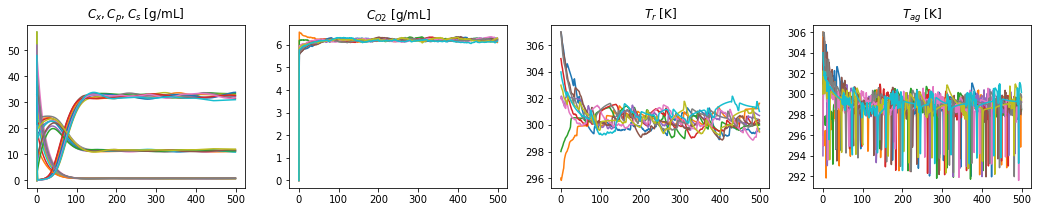

In [5]:
N = 10
solutions_name = str(N) + "_solutions.npy"
F_ag_array_name = str(N) + "_F_ag.npy"
save_dir = "./saved"
os.makedirs (save_dir, exist_ok=True)


train_random_inputs = generate_inputs (N)
solutions, F_ag_array = generate_ode_data(train_random_inputs, num_timesteps=500)

print ("="*50)
print ("Saved: ")
print (f"{solutions_name}: {solutions.shape}")
print (f"{F_ag_array_name}: {F_ag_array.shape}")
print ("="*50)

# SAVE
np.save (join(save_dir, solutions_name), solutions)
np.save (join(save_dir, F_ag_array_name), F_ag_array)

# PLOT
plot_ode_solutions (solutions)

### Visualizing input and output sequences like the paper shows on page ___

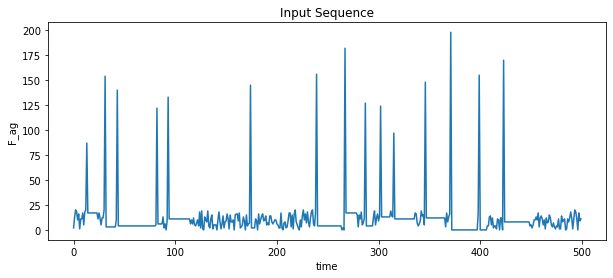

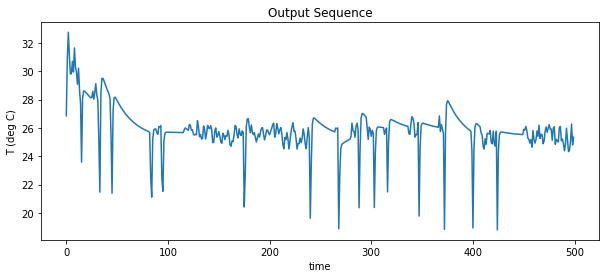

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))
plt.title("Input Sequence")
plt.xlabel("time")
plt.ylabel("F_ag")
# plt.xlim(100,500)
plt.plot(F_ag_array[0,:])
plt.show()

plt.figure(figsize=(10,4))
plt.title("Output Sequence")
plt.xlabel("time")
# plt.xlim(100,500)
# plt.ylim(26,34)
plt.ylabel("T (deg C)")
plt.plot(solutions[0][-1].T - 273.15)
plt.show()

iter 0 | loss = 90508.6171875
iter 1 | loss = 66957.203125
iter 2 | loss = 39093.6796875
iter 3 | loss = 8794.0126953125
iter 4 | loss = 9645.9033203125
iter 5 | loss = 21803.494140625
iter 6 | loss = 5146.91064453125
iter 7 | loss = 150.2068328857422
iter 8 | loss = 4314.0078125
iter 9 | loss = 8329.275390625
iter 0 | loss = 8694.1767578125
iter 1 | loss = 7266.98486328125
iter 2 | loss = 2970.444580078125
iter 3 | loss = 320.81524658203125
iter 4 | loss = 910.4212036132812
iter 5 | loss = 4057.7265625
iter 6 | loss = 4370.54638671875
iter 7 | loss = 1931.828857421875
iter 8 | loss = 185.0340576171875
iter 9 | loss = 206.1083984375
iter 0 | loss = 757.2809448242188
iter 1 | loss = 2511.58251953125
iter 2 | loss = 2154.000244140625
iter 3 | loss = 1636.56884765625
iter 4 | loss = 423.3009948730469
iter 5 | loss = 4.250130653381348
iter 6 | loss = 497.6311340332031
iter 7 | loss = 1137.674560546875
iter 8 | loss = 1278.880859375
iter 9 | loss = 722.5477905273438
iter 0 | loss = 446.1380

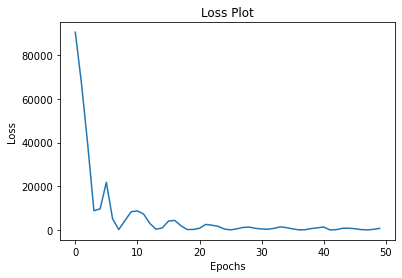

In [7]:
train_data = data_preprocessing(solutions, batch_size = 1, shuffle = False)
model = NeuralNet(num_hidden_layers = 2)
train(model, train_data, optimizer = "Adam", num_epochs = 100)

### Testing the NN

num_timesteps = 500
1/1
ODE solution found: True
Saved: 
1test_solutions.npy: (10, 6, 500)
1test_F_ag.npy: (1, 500)


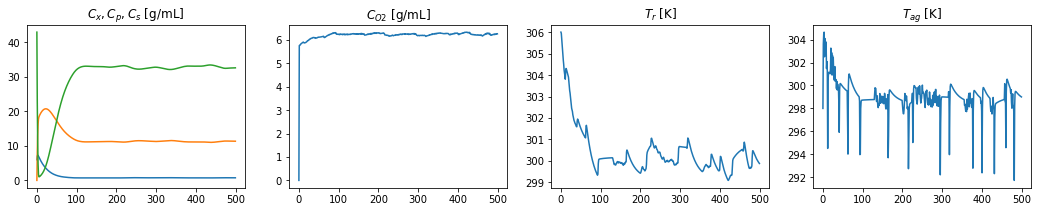

In [ ]:
N = 1
solutions_name = str(N) + "test_solutions.npy"
F_ag_array_name = str(N) + "test_F_ag.npy"
save_dir = "./saved"
os.makedirs (save_dir, exist_ok=True)


test_random_inputs = generate_inputs (N)
test_solutions, F_ag_array = generate_ode_data(test_random_inputs, num_timesteps=500)

print ("="*50)
print ("Saved: ")
print (f"{solutions_name}: {solutions.shape}")
print (f"{F_ag_array_name}: {F_ag_array.shape}")
print ("="*50)

# SAVE
np.save (join(save_dir, solutions_name), solutions)
np.save (join(save_dir, F_ag_array_name), F_ag_array)

# PLOT
plot_ode_solutions (test_solutions)

In [ ]:
test_data = data_preprocessing(test_solutions, batch_size = 1, shuffle = False)
print(test_data.shape)
test(model, test_data)

AttributeError: 'DataLoader' object has no attribute 'shape'